## Лекция 7. Построение модели классификации.

* [Теоретическая часть](#theory)
    * [Балансировка классов](#class_balancing)
    * [Схемы оценки обобщающей способности алгоритма](#generalizing_ability)
    * [Обзор алгоритмов классификации](#classification_models)
        * [Логистическая регрессия](#logreg)
        * [Метод опорных векторов](#svm)
        * [k ближайших соседей](#knn)
        * [Дерево решений](#dt)
        * [Бэггинг](#bagging)
        * [Случайный лес](#rb)
        * [Бустинг](#boosting)
        * [Градиентный бустинг](#gb)
        * [XGBoost](#xgb)
        * [Catboost](#catboost)
* [Практическая часть](#practice)
    * [Загрузка данных](#load_data)
    * [Отбор признаков](#feature_selection)
    * [Масштабрование данных](#scaler)
    * [Разбиение на train и test](#train_and_test)
    * [Сохранение обучающего и тестового датасетов](#train_test_saving)
    * [Построение и оценка базовых моделей](#baseline_modeling)
    * [Выбор лучшей модели и подбор гиперпараметров](#tuning_best_model)
    * [Балансировка целевой переменной](#target_balancing)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

### Балансировка классов<a class="anchor" id="class_balancing"></a>

**Описание проблемы**

Для многих алгоритмов классификации существенной проблемой является дисбаланс классов целевой переменной. В случаях когда примеров одного класса существенно больше, чем примеров другого класса, возникает вероятность того, что алгоритм переучится на примерах превалирующего класса. Ситуация ещё больше усугубляется при многоклассовой классификации.

**Способы борьбы с дисбалансом классов**

1. Собрать больше данных
2. Выбрать подходящую метрику качества
3. Попробовать разные модели, одни модели более устойчивы к несбалансированным данным, чем другие
4. Штраф за ошибки при прогнозе меньшего класса
5. Undersampling и Oversampling
6. Создание синтетических примеров для меньшего класса

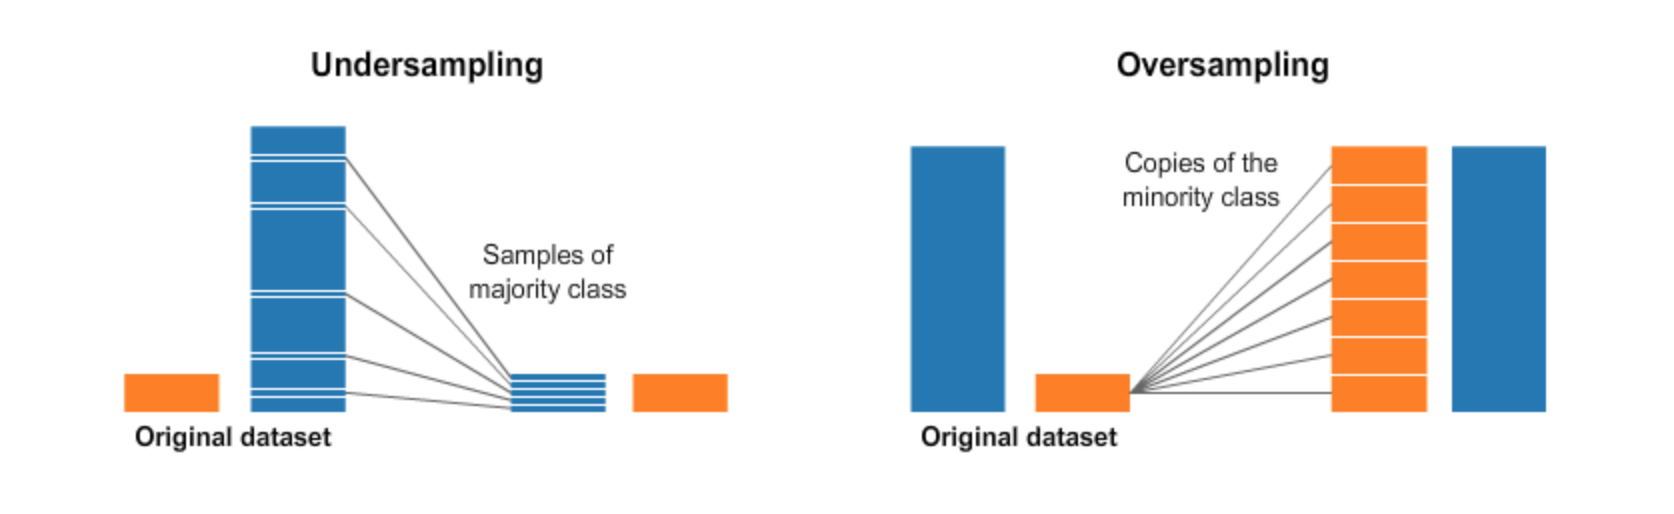

Undersampling с использованием Tomek Links:
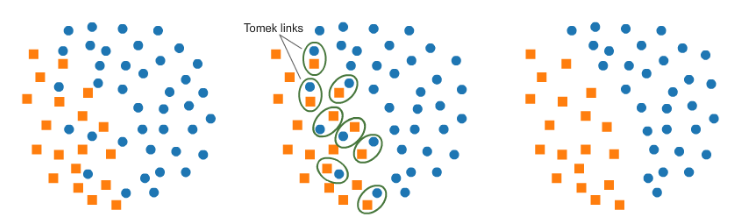

Oversampling со SMOTE:

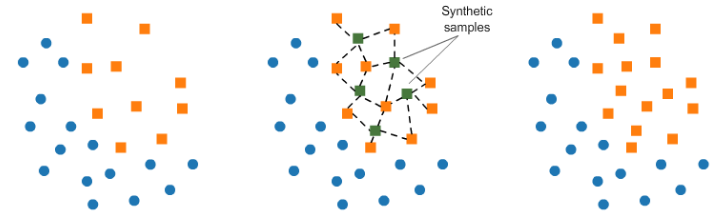

### Схемы оценки обобщающей способности алгоритма<a class="anchor" id="generalizing_ability"></a>

**Обобщающая способность алгоритма**

Модель, обладающая хорошей обобщающей способностью, способна предсказывать примерно на одном и том же уровне качества, как на обучающем датасете, так и на новых данных.

В процессе построения модели необходимо оценивать качество прогнозов на данных, которые модель не видела во время обучения, чтобы избежать недообучения / переобучения нашего алгоритма.

Для имитации прогнозирования на новых данных, имея в распоряжении только обучающую выборку, используют два приёма - *отложенную выборку* и *кросс-валидацию*.

**Отложенная выборка**

Обучающая выборка разбивается на две части train и test, в тестовую часть, как правило, идёт от 20% до 33% наблюдений, остальное в обучающую. На обучающей части модель тренируется. При этом происходит настройка гиперпараметров, а после -сравнивае прогнозов между обучающей и тестовой частями, чтобы понять, как модель поведёт себя на данных, которые не видела до этого.

**Кросс-валидация**

Данный способ, в своей основе, похож на предыдущий. Обучающая выборка разбивается на k непересекающихся частей, как правило 3 или 5, после чего каждая из частей поочерёдно выступает в роли тестовой части, а оставшиеся в роли обучающей. Таким образом модель проходи k стадий проверок, полностью задействуя обучающий датасет.

**Стратификация**

Выборка разбивается на фолды так, чтобы в каждом фолде сохранялось соотношения классов.

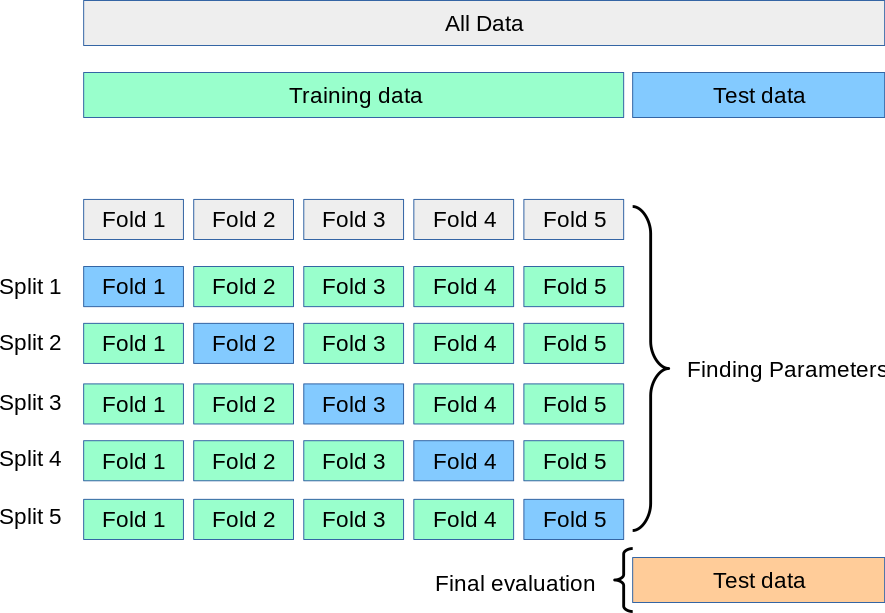

### Обзор алгоритмов классификации<a class="anchor" id="classification_models"></a>

**Логистическая регрессия**<a class="anchor" id="logreg"></a>

$$a(x) = b + \sum_{i=0}^{d}{w_i * x_i}$$
$$a(x) = \sum_{i=0}^{d+1}{w_i * x_i} = \langle w,x \rangle $$

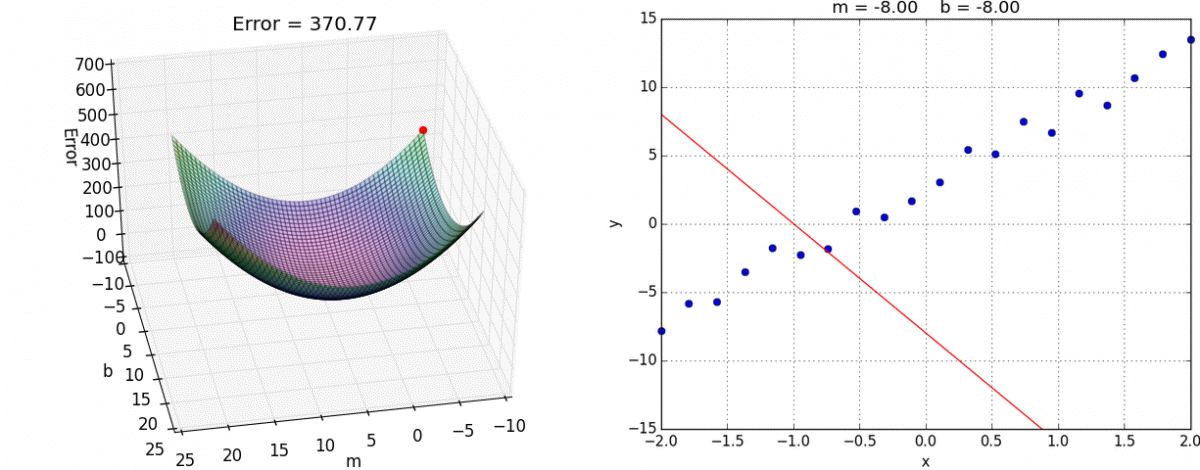

$$a(x) = sign(\langle w,x \rangle)$$

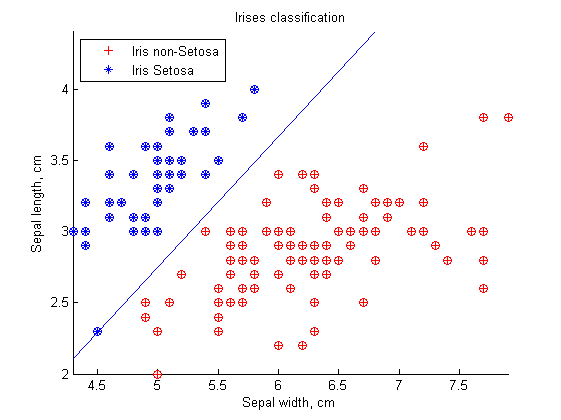

$$M_i = y_i(\langle w,x \rangle)$$

$M_i > 0$ - классификатор дает верный ответ<br>
$M_i < 0$ - классификатор ошибается<br>
Чем дальше отступ от нуля, тем классификатор больше уверен в своём ответе

**Метод опорных векторов**

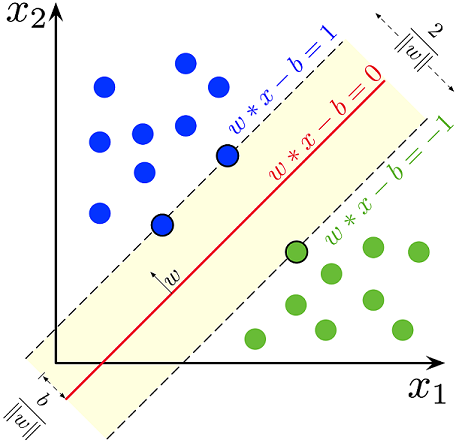

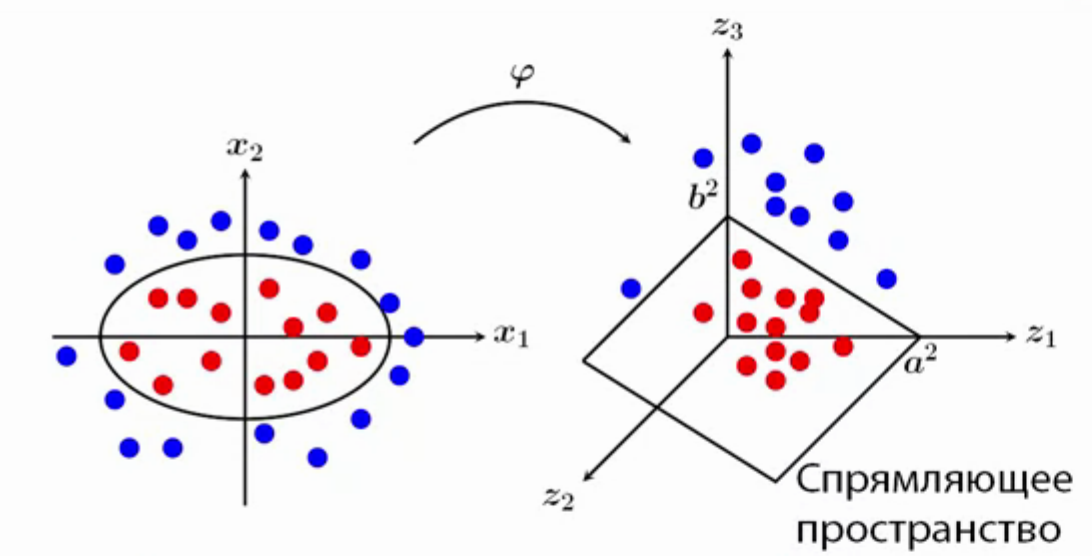

Можно не делать явные преобразования признаков, а вместо скалярного произведения использовать функцию K.
$$
\begin{eqnarray}
x \rightarrow \phi(x) \\
w \rightarrow \phi(w)
\nonumber
\end{eqnarray}
\qquad \Rightarrow \langle w, x \rangle \rightarrow \langle \phi(w), \phi(x) \rangle
 $$

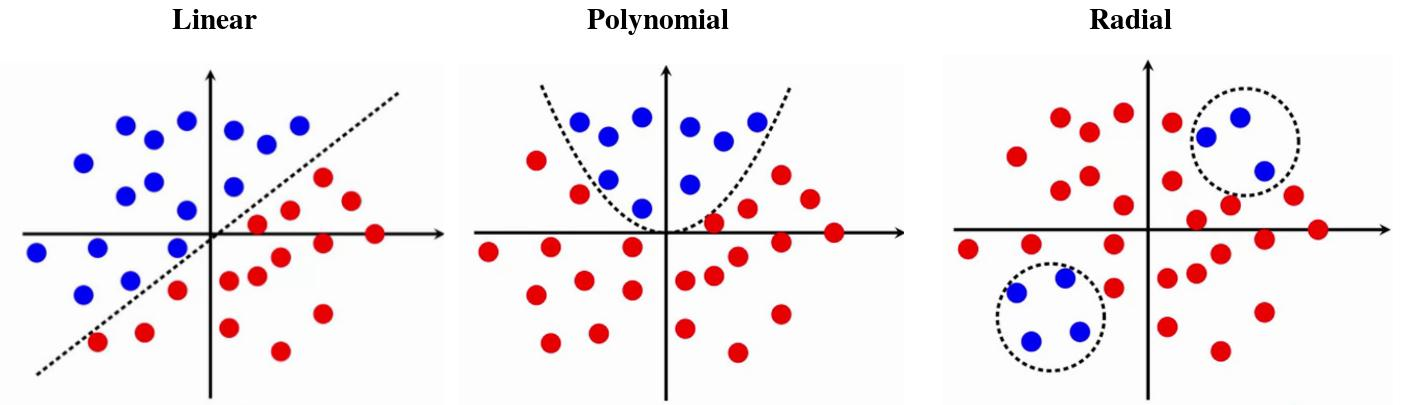

**k ближайших соседей**<a class="anchor" id="knn"></a>

knn.png

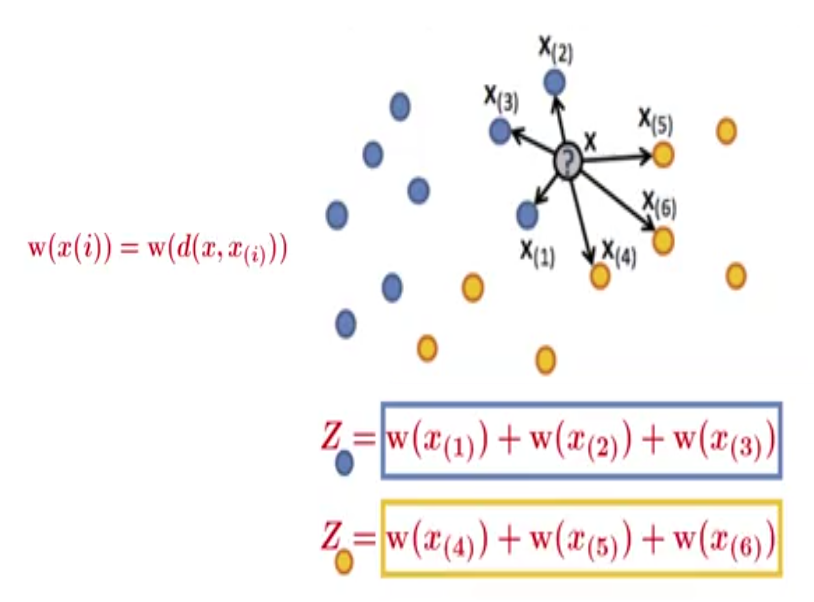

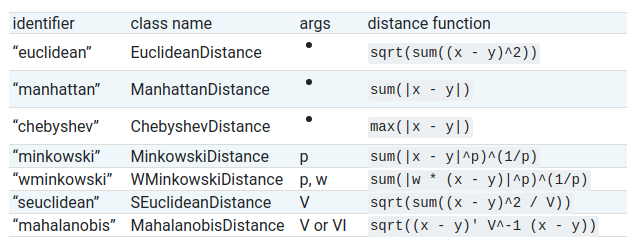

**Дерево решений**<a class="anchor" id="dt"></a>

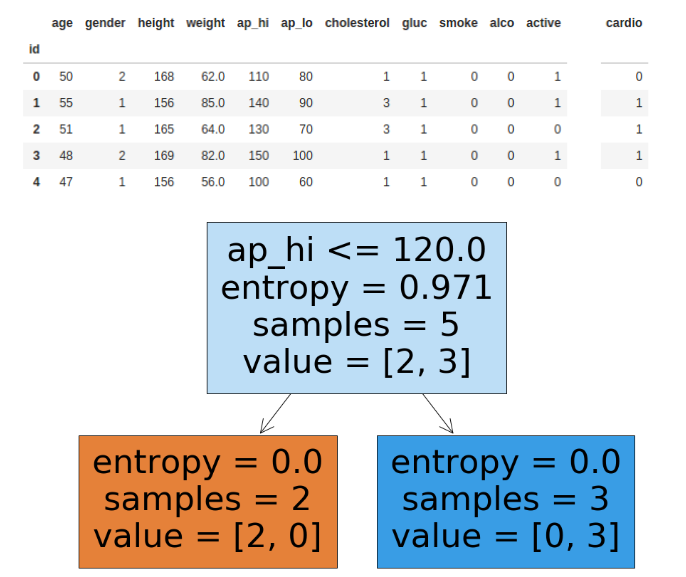

<center><h4><i>Энтропия Шенона</i></h4></center><br>
$$S = -\sum_{i=0}^n{p_ilog_2(p_i)}$$
$$S = -(p_0log_2(p_0) + p_1log_2(p_1))$$

$$S_{root} = -(\frac{2}{5}log(\frac{2}{5}) + \frac{3}{5}log(\frac{3}{5})) = 0.97$$
$$S_0 = -(\frac{2}{2}log(\frac{2}{2}) = 0$$
$$S_1 = -(\frac{3}{3}log(\frac{3}{3}) = 0$$

<center><h4><i>Критерий Джини</i></h4></center><br>

$$G = 1 - \sum_{i=0}^n{p_i^2} = \sum_{i=0}^n{p_i(1-p_i)}$$

<center><h4><i>Прирост информации (Information Gain)</i></h4></center><br>
$$IG = S_{root} -\sum_{i=0}^q{\frac{n_i}{n}S_i}$$
$$IG = S_{root}-(\frac{n_i}{n}S_0 + \frac{n_i}{n}S_1))$$

$$IG = 0.97-(\frac{2}{5}0 + \frac{3}{5}0) = 0.97$$

**Бэггинг**<a class="anchor" id="bagging"></a>

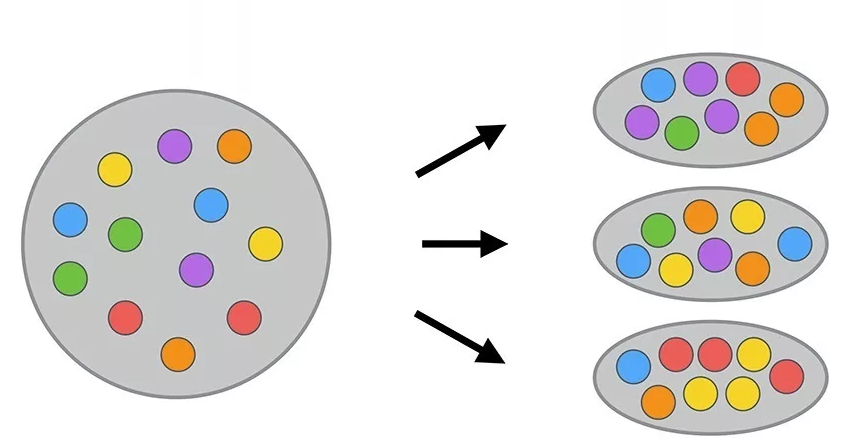

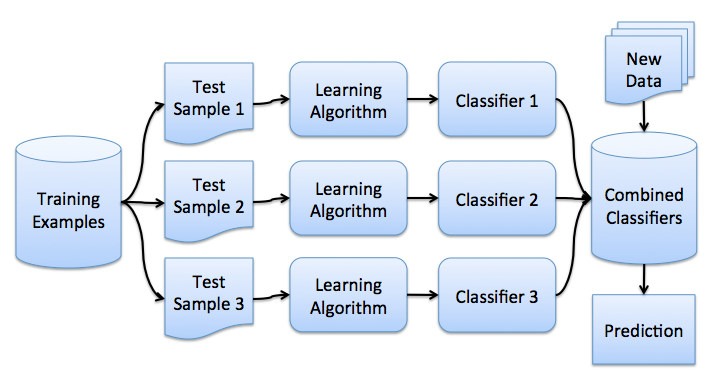

**Случайный лес**

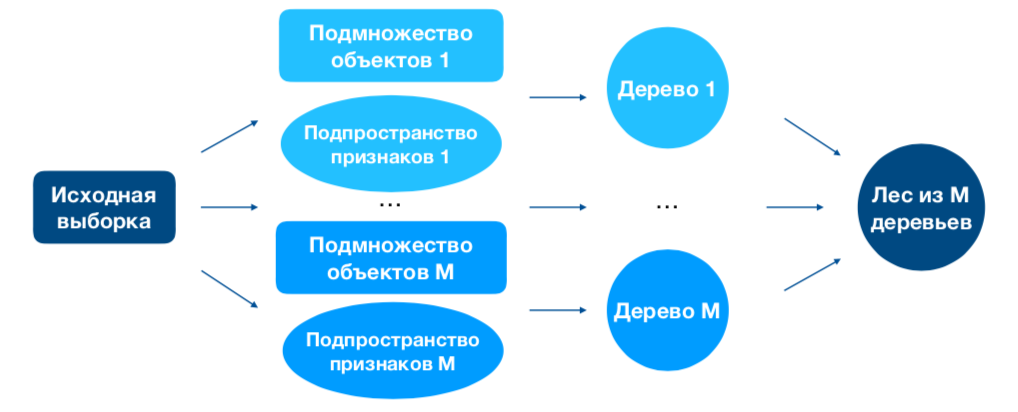

- При каждом разбиении рандомно выбирается ограниченное (q) количество признаков


**Бустинг**<a class="anchor" id="boosting"></a>

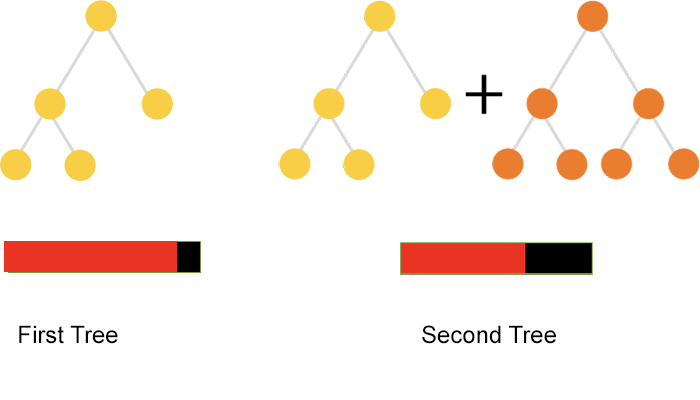

**Градиентный бустинг**<a class="anchor" id="gb"></a>

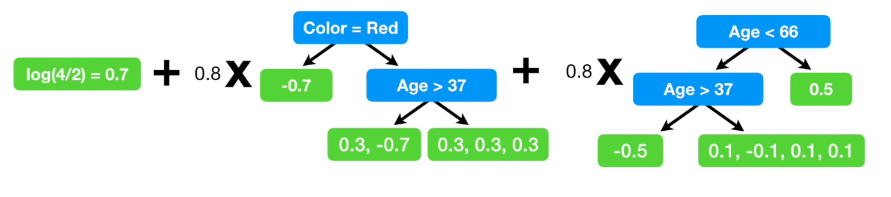

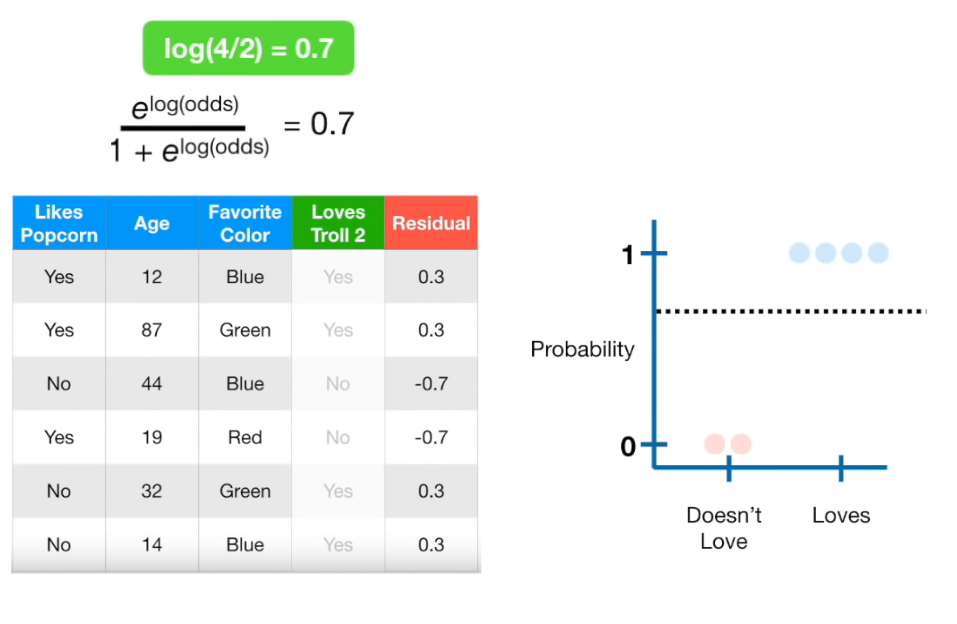

**XGBoost (eXtreme Gradient Boosting)**<a class="anchor" id="xgb"></a><br>

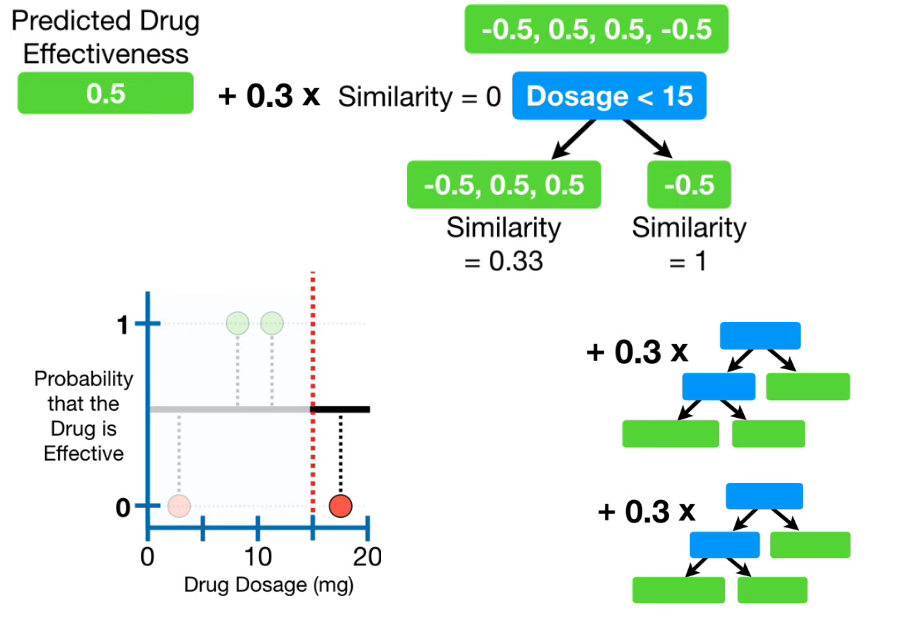

<center><h4><i>Похожесть</i></h4></center><br>
$$Similarity = \frac{(\sum{Resideal_i})^2}{\sum{[Prev Proba_i * (1 - Prev Proba_i)]} + \lambda}$$

$Similarity_{10} =\frac{(-0.5 + 0.5 + 0.5 -0.5)^2}{[(0.5 * (1 - 0.5)) + (0.5 * (1 - 0.5)) + (0.5 * (1 - 0.5)) + (0.5 * (1 - 0.5))] + 0} = 0$<br>
$Similarity_{11} =\frac{(-0.5 + 0.5 + 0.5)^2}{[(0.5 * (1 - 0.5)) + (0.5 * (1 - 0.5)) + (0.5 * (1 - 0.5))] + 0} = 0.33$<br>
$Similarity_{21} =\frac{(-0.5)^2}{0.5 * (1 - 0.5) + 0} = 1$

<center><h4><i>Прирост</i></h4></center><br>
$$Gain = Left_{Similarity} + Right_{Similarity} - Root_{Similarity}$$

$Gain = 0.33 + 1 - 0 = 1.33$

<center><h4><i>Стрижка деревьев</i></h4></center><br>
$$Gain - \gamma \geqslant 0 \Rightarrow оставляем$$
$$Gain - \gamma < 0 \Rightarrow убираем$$

$\lambda$ - регуляризация
    - default=1
$\gamma$ - минимальный прирост, чтобы не убирать разделение
    - default=0
    - range: [0,∞]
$\eta$ - learning rate (скорость обучения)
    - default=0.3
    - range: [0,1]

**LightGBM**<a class="anchor" id="lgbm"></a><br>


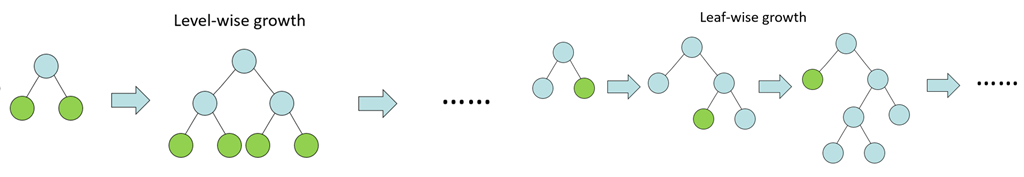

*Gradient-based One-Side Sampling (GOSS)*

GOSS сохраняет наблюдения с большим градиентом и случайно сэмплирует выборку из наблюдений с маленькими градиентами.<br>
Итого, выбирается a$*$100% наблюдений из топа с большими градиентами.<br>
Рандомно b$*$100% наблюдений из остальной.<br>

*Exclusive Feature Bundling (EFB)*

Разряжённые данные значат, что многие признаки никогда ненулевые вместе. Это позволяет совместить ("bundle") эти фичи в одну без потери информации.<br>
Пример, у фичи А диапазон значений (0, 10) и у B - (0, 20). Добавляется смещение 10 к значениям фичи B, теперь их диапазон (10, 30). После, можно соединять A и B и использовать "feature bundle" с диапазоном (0, 30), чтобы заменить оригинальные A и B.

**CatBoost**<a class="anchor" id="catboost"></a><br>


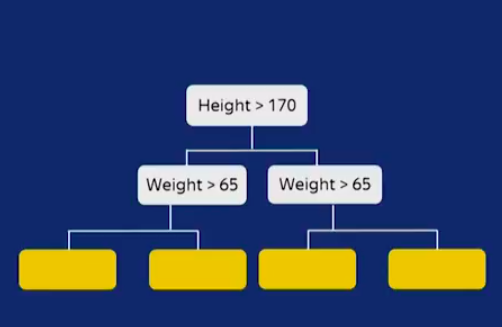

- Предотвращение переобучения
    - Обучается несколько моделей за одну итерацию и высчитываются остатки по наблюдениям на тех моделях, которые не видели его.
    - Высокий уровень рандома (перемешивание выборки и много случайности в начале построения дерева)
  
- Работа с категориальными признаками

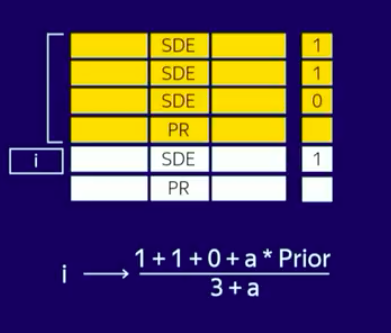

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

**Подключение библиотек и скриптов**

In [2]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import pickle
import random
from pathlib import Path

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [6]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [87]:
def balance_df_by_target(df, target_name, method='over'):

    assert method in ['over', 'under', 'tomek', 'smote'], 'Неверный метод сэмплирования'

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    if method == 'over':
        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df._append(sample, ignore_index=True)

    elif method == 'under':
        df_ = df.copy()
        df = df_[df_[target_name] == minor_class_name]
        tmp = df_[df_[target_name] == major_class_name]
        df = df._append(tmp.iloc[
            np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])
        ], ignore_index=True)

    elif method == 'tomek':
        from imblearn.under_sampling import TomekLinks
        tl = TomekLinks()
        X_tomek, y_tomek = tl.fit_sample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_tomek, y_tomek], axis=1)

    elif method == 'smote':
        from imblearn.over_sampling import SMOTE
        smote = SMOTE()
        X_smote, y_smote = smote.fit_sample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_smote, y_smote], axis=1)

    return df.sample(frac=1)

**Пути к директориям и файлам**

In [8]:
DATA_ROOT = '/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_7/data/training_project/'
MODELS_PATH = '/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_7/models/'

# input
DATASET_PATH ='/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_7/data/training_project/training_project_data.csv'
PREP_DATASET_PATH =  '/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_7/data/training_project/training_project_data_prep.csv'

# output
TRAIN_FULL_PATH = '/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_7/training_project_train_full.csv'
TRAIN_PART_PATH = '/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_7/training_project_train_part_b.csv'
TEST_PART_PATH = '/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_7/training_project_test_part.csv'

SCALER_FILE_PATH = '/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_7/scaler.pkl'

### Загрузка данных<a class="anchor" id="load_data"></a>

**Описание базового датасета**

* **LIMIT_BAL** - Сумма предоставленного кредита
* **SEX** - Пол (1=мужчина, 2=женщина)
* **EDUCATION** - Образование (1=аспирантура, 2=университет, 3=старшая школа, 4=прочее, 5=неизвестно, 6=неизвестно)
* **MARRIAGE** - Семейное положение (1=женат/замужен, 2=не женат/не замуженм, 3=прочее)
* **AGE** - Возраст (в годах)
* **PAY_1** - Статус погашения в Сентябре (-1=погашен полностью, 0=погашен частично, 1=отсрочка платежа на один месяц, .., 3=отсрочка платежа на три месяца и более)
* **PAY_2** - Статус погашения в Августе
* **PAY_3** - Статус погашения в Июле
* **PAY_4** - Статус погашения в Июне
* **PAY_5** - Статус погашения в Мае
* **PAY_6** - Статус погашения в Апреле
* **BILL_AMT1** - Сумма выписки по счету в Сентябре
* **BILL_AMT2** - Сумма выписки по счету в Августе
* **BILL_AMT3** - Сумма выписки по счету в Июле
* **BILL_AMT4** - Сумма выписки по счету в Июне
* **BILL_AMT5** - Сумма выписки по счету в Мае
* **BILL_AMT6** - Сумма выписки по счету в Апреле
* **PAY_AMT1** - Сумма предыдущего платежа в Сентябре
* **PAY_AMT2** - Сумма предыдущего платежа в Августе
* **PAY_AMT3** - Сумма предыдущего платежа в Июле
* **PAY_AMT4** - Сумма предыдущего платежа в Июне
* **PAY_AMT5** - Сумма предыдущего платежа в Мае
* **PAY_AMT6** - Сумма предыдущего платежа в Апреле
* **NEXT_MONTH_DEFAULT** - Просрочка платежа в следующем месяце (1=да, 0=нет)

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [10]:
df_base = pd.read_csv(DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH)

df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   150000.0    2          2         2   24      1      2      0      0   
1    50000.0    2          3         1   46      3      3      3      3   
2   150000.0    2          2         1   41     -1     -1     -1     -1   
3   150000.0    2          2         2   35      0      0      0      0   
4    70000.0    2          1         1   35      1      2      2      2   

   PAY_5  ...  PAY_4_2  PAY_4_3  PAY_5_-1  PAY_5_0  PAY_5_2  PAY_5_3  \
0      0  ...        0        0         0        1        0        0   
1      2  ...        0        1         0        0        1        0   
2      0  ...        0        0         0        1        0        0   
3      0  ...        0        0         0        1        0        0   
4      2  ...        1        0         0        0        1        0   

   PAY_6_-1  PAY_6_0  PAY_6_2  PAY_6_3  
0         0        1        0        0  
1         0        1        0        0  
2         0        1        0        0  
3         0        1        0        0  
4         0        1        0        0  

[5 rows x 61 columns]

**Выделение целевой переменной и групп признаков**

In [11]:
TARGET_NAME = 'NEXT_MONTH_DEFAULT'
BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()

In [12]:
df[TARGET_NAME].value_counts()

NEXT_MONTH_DEFAULT
0    7805
1    2195
Name: count, dtype: int64

### Отбор признаков<a class="anchor" id="feature_selection"></a>

In [13]:
NUM_FEATURE_NAMES = ['LIMIT_BAL', 'AGE',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

CAT_FEATURE_NAMES = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + CAT_FEATURE_NAMES + NEW_FEATURE_NAMES

### Масштабрование данных<a class="anchor" id="scaler"></a>

In [14]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

**Сохранение модели для масштабирования данных**

In [15]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

### Разбиение на train и test<a class="anchor" id="train_and_test"></a>

In [16]:
X = df[SELECTED_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y)

display(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

NEXT_MONTH_DEFAULT
0    0.780571
1    0.219429
Name: proportion, dtype: float64

NEXT_MONTH_DEFAULT
0    0.780333
1    0.219667
Name: proportion, dtype: float64

### Сохранение обучающего и тестового датасетов<a class="anchor" id="train_test_saving"></a>

In [17]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [18]:
df.to_csv(TRAIN_FULL_PATH, index=False, encoding='utf-8')
train.to_csv(TRAIN_PART_PATH, index=False, encoding='utf-8')
test.to_csv(TEST_PART_PATH, index=False, encoding='utf-8')

### Построение и оценка базовых моделей<a class="anchor" id="baseline_modeling"></a>

**Логистическая регрессия**

In [19]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

evaluate_preds(model_lr, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5464
           1       0.68      0.35      0.47      1536

    accuracy                           0.82      7000
   macro avg       0.76      0.65      0.68      7000
weighted avg       0.80      0.82      0.80      7000

TEST

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2341
           1       0.70      0.35      0.47       659

    accuracy                           0.83      3000
   macro avg       0.77      0.66      0.68      3000
weighted avg       0.81      0.83      0.80      3000

CONFUSION MATRIX

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   2243   98
1                    426  233


**k ближайших соседей**

In [20]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

evaluate_preds(model_knn, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5464
           1       0.72      0.45      0.55      1536

    accuracy                           0.84      7000
   macro avg       0.79      0.70      0.73      7000
weighted avg       0.83      0.84      0.83      7000

TEST

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2341
           1       0.58      0.34      0.42       659

    accuracy                           0.80      3000
   macro avg       0.70      0.63      0.65      3000
weighted avg       0.78      0.80      0.78      3000

CONFUSION MATRIX

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   2178  163
1                    438  221


**Дерево решений**

In [21]:
model_tree = DecisionTreeClassifier(random_state=21,
                                    class_weight={0:1, 1:3.6},
                                    max_depth=4
                                    )
model_tree.fit(X_train, y_train)

evaluate_preds(model_tree, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      5464
           1       0.51      0.57      0.54      1536

    accuracy                           0.78      7000
   macro avg       0.69      0.71      0.70      7000
weighted avg       0.79      0.78      0.79      7000

TEST

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2341
           1       0.51      0.53      0.52       659

    accuracy                           0.78      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.79      0.78      0.78      3000

CONFUSION MATRIX

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   1998  343
1                    308  351


**Бустинговые алгоритмы**

*XGBoost*

In [22]:
%%time
model_xgb = xgb.XGBClassifier(random_state=21,
                              n_estimators=100,
                              max_depth = 3
                             )
model_xgb.fit(X_train, y_train)

evaluate_preds(model_xgb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5464
           1       0.78      0.46      0.58      1536

    accuracy                           0.85      7000
   macro avg       0.82      0.71      0.74      7000
weighted avg       0.85      0.85      0.84      7000

TEST

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2341
           1       0.67      0.36      0.47       659

    accuracy                           0.82      3000
   macro avg       0.75      0.66      0.68      3000
weighted avg       0.80      0.82      0.80      3000

CONFUSION MATRIX

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   2221  120
1                    420  239
CPU times: user 2.85 s, sys: 14 ms, total: 2.86 s
Wall time: 4.48 s


*LightGBM*

In [23]:
%%time
model_lgbm = lgbm.LGBMClassifier(random_state=21,
                                 class_weight={0:1, 1:3.6},
                                 n_estimators=10
                                )
model_lgbm.fit(X_train, y_train)

evaluate_preds(model_lgbm, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 1536, number of negative: 5464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3279
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502984 -> initscore=0.011934
[LightGBM] [Info] Start training from score 0.011934
TRAIN

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      5464
           1       0.49      0.72      0.59      1536

    accuracy                           0.78      7000
   macro avg       0.70      0.76      0.72      7000
weighted avg       0.82      0.78      0.79      7000

TEST

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      234

*CatBoost*

In [24]:
%%time
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5464
           1       0.87      0.53      0.66      1536

    accuracy                           0.88      7000
   macro avg       0.88      0.75      0.79      7000
weighted avg       0.88      0.88      0.87      7000

TEST

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2341
           1       0.67      0.37      0.48       659

    accuracy                           0.82      3000
   macro avg       0.76      0.66      0.69      3000
weighted avg       0.80      0.82      0.80      3000

CONFUSION MATRIX

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   2218  123
1                    412  247
CPU times: user 11.5 s, sys: 1.49 s, total: 13 s
Wall time: 19.5 s


### Подготовка для catboost

In [25]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0  -0.139741    2          2         2 -1.239383      1      2      0      0   
1  -0.908309    2          3         1  1.153248      3      3      3      3   
2  -0.139741    2          2         1  0.609468     -1     -1     -1     -1   
3  -0.139741    2          2         2 -0.043067      0      0      0      0   
4  -0.754595    2          1         1 -0.043067      1      2      2      2   

   PAY_5  ...  PAY_4_2  PAY_4_3  PAY_5_-1  PAY_5_0  PAY_5_2  PAY_5_3  \
0      0  ...        0        0         0        1        0        0   
1      2  ...        0        1         0        0        1        0   
2      0  ...        0        0         0        1        0        0   
3      0  ...        0        0         0        1        0        0   
4      2  ...        1        0         0        0        1        0   

   PAY_6_-1  PAY_6_0  PAY_6_2  PAY_6_3  
0         0        1        0        0  
1         0        1        0        0  
2         0        1        0        0  
3         0        1        0        0  
4         0        1        0        0  

[5 rows x 61 columns]

In [26]:
BASE_FEATURE_NAMES

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [27]:
X = df[BASE_FEATURE_NAMES]
y = df[TARGET_NAME]

CAT_FEATURE_NAMES = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y)

In [28]:
X_train[CAT_FEATURE_NAMES]['PAY_1'].nunique()

5

In [29]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21,
                                     cat_features=CAT_FEATURE_NAMES,
                                     one_hot_max_size=5
                                     )
model_catb.fit(X_train, y_train)

evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      5464
           1       0.87      0.51      0.64      1536

    accuracy                           0.88      7000
   macro avg       0.87      0.74      0.78      7000
weighted avg       0.87      0.88      0.86      7000

TEST

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2341
           1       0.67      0.36      0.47       659

    accuracy                           0.82      3000
   macro avg       0.75      0.66      0.68      3000
weighted avg       0.80      0.82      0.80      3000

CONFUSION MATRIX

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   2221  120
1                    419  240


In [30]:
disbalance = y_train.value_counts()[0] / y_train.value_counts()[1]
disbalance

3.5572916666666665

In [31]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21,
                                     cat_features=CAT_FEATURE_NAMES,
                                    #  one_hot_max_size=5,
                                     class_weights=[1, disbalance]
                                     )
model_catb.fit(X_train, y_train)

evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5464
           1       0.60      0.82      0.69      1536

    accuracy                           0.84      7000
   macro avg       0.77      0.83      0.79      7000
weighted avg       0.87      0.84      0.85      7000

TEST

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2341
           1       0.49      0.59      0.54       659

    accuracy                           0.78      3000
   macro avg       0.68      0.71      0.69      3000
weighted avg       0.79      0.78      0.78      3000

CONFUSION MATRIX

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   1938  403
1                    269  390


[Гиперпараметры catboost](https://catboost.ai/docs/concepts/python-reference_parameters-list.html#python-reference_parameters-list)

In [32]:
from google.colab import output
output.enable_custom_widget_manager()

In [33]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21,
                                     class_weights=[1, disbalance],
                                     eval_metric='F1',
                                     cat_features=CAT_FEATURE_NAMES,
#                                      early_stopping_rounds=20,
#                                      use_best_model=True,
#                                      custom_metric=['Precision', 'Recall']
                                    )
model_catb.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [34]:
model_catb.best_score_

{'learn': {'Logloss': 0.2734211189583165, 'F1': 0.931501376441783},
 'validation': {'Logloss': 0.5576961309131181, 'F1': 0.6794929684504168}}

In [35]:
evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5464
           1       0.50      0.67      0.58      1536

    accuracy                           0.78      7000
   macro avg       0.70      0.74      0.71      7000
weighted avg       0.81      0.78      0.79      7000

TEST

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2341
           1       0.49      0.61      0.54       659

    accuracy                           0.77      3000
   macro avg       0.68      0.71      0.70      3000
weighted avg       0.79      0.77      0.78      3000

CONFUSION MATRIX

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   1920  421
1                    259  400


### Выбор лучшей модели и подбор гиперпараметров<a class="anchor" id="tuning_best_model"></a>

In [36]:
frozen_params = {
     'class_weights':[1, disbalance],
     'silent':True,
     'random_state':21,
     'cat_features':CAT_FEATURE_NAMES,
     'eval_metric':'F1',
     'early_stopping_rounds':20
}
model_catb = catb.CatBoostClassifier(**frozen_params)

**Подбор гиперпараметров**

In [37]:
params = {'iterations':[50, 200, 500, 700, 1500],
          'max_depth':[3, 5, 7]}
          # 'n_estimators':[10, 30, 50, 70]}

In [38]:
cv = StratifiedKFold(n_splits=3, random_state=21, shuffle=True)

In [39]:
grid_search = model_catb.grid_search(params, X_train, y_train, cv=cv, stratified=True, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.615264308
bestIteration = 0

0:	loss: 0.6152643	best: 0.6152643 (0)	total: 288ms	remaining: 4.03s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6618319953
bestIteration = 86

1:	loss: 0.6618320	best: 0.6618320 (1)	total: 1.86s	remaining: 12.1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6618319953
bestIteration = 86

2:	loss: 0.6618320	best: 0.6618320 (1)	total: 2.89s	remaining: 11.6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6618319953
bestIteration = 86

3:	loss: 0.6618320	best: 0.6618320 (1)	total: 3.79s	remaining: 10.4s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6618319953
bestIteration = 86

4:	loss: 0.6618320	best: 0.6618320 (1)	total: 4.68s	remaining: 9.37s

bestTest = 0.6513701266
bestIteration = 49

5:	loss: 0.6513701	best: 0.6618320 (1)	total: 5.14s	remaining: 7.71s
Stopped by overfitting detector  (20 iterations 

In [40]:
grid_search

{'params': {'depth': 7, 'iterations': 200},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
       

In [41]:
pd.DataFrame(grid_search['cv_results']).sort_values('test-F1-mean', ascending=False)

iterations  test-F1-mean  test-F1-std  train-F1-mean  train-F1-std  \
87           87      0.663003     0.010460       0.696871      0.010259   
89           89      0.662560     0.011187       0.697338      0.011056   
88           88      0.662490     0.011302       0.697374      0.011117   
107         107      0.662351     0.011531       0.699161      0.014178   
75           75      0.662351     0.011531       0.695407      0.007779   
..          ...           ...          ...            ...           ...   
3             3      0.641199     0.023753       0.670721      0.014251   
5             5      0.640509     0.022880       0.667740      0.007710   
6             6      0.640272     0.024737       0.670746      0.011509   
2             2      0.637596     0.020187       0.667166      0.008649   
4             4      0.635330     0.023053       0.665111      0.016568   

     test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
87            0.582070          0.007323            0.549331   
89            0.582072          0.007323            0.548837   
88            0.582055          0.007325            0.549052   
107           0.581904          0.007349            0.546140   
75            0.582331          0.007305            0.551138   
..                 ...               ...                 ...   
3             0.668586          0.001660            0.665403   
5             0.658256          0.002327            0.653795   
6             0.653525          0.002665            0.648267   
2             0.674462          0.001391            0.671693   
4             0.663251          0.002059            0.659415   

     train-Logloss-std  
87            0.030733  
89            0.031345  
88            0.031078  
107           0.034870  
75            0.028599  
..                 ...  
3             0.001735  
5             0.002094  
6             0.002486  
2             0.001873  
4             0.001981  

[108 rows x 9 columns]

**Обучение и оценка финальной модели**

In [42]:
%%time

final_model = catb.CatBoostClassifier(**frozen_params, iterations=200, max_depth=7)
final_model.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

evaluate_preds(final_model, X_train, X_test, y_train, y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      5464
           1       0.51      0.65      0.57      1536

    accuracy                           0.78      7000
   macro avg       0.70      0.74      0.71      7000
weighted avg       0.81      0.78      0.79      7000

TEST

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2341
           1       0.50      0.59      0.54       659

    accuracy                           0.78      3000
   macro avg       0.69      0.71      0.70      3000
weighted avg       0.79      0.78      0.79      3000

CONFUSION MATRIX

col_0                  0    1
NEXT_MONTH_DEFAULT           
0                   1946  395
1                    269  390
CPU times: user 3.35 s, sys: 292 ms, total: 3.64 s
Wall time: 2.32 s


### Балансировка целевой переменной<a class="anchor" id="target_balancing"></a>

In [43]:
import inspect
print(inspect.getsource(balance_df_by_target))

def balance_df_by_target(df, target_name, method='over'):

    assert method in ['over', 'under', 'tomek', 'smote'], 'Неверный метод сэмплирования'

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    if method == 'over':
        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df.append(sample, ignore_index=True)

    elif method == 'under':
        df_ = df.copy()
        df = df_[df_[target_name] == minor_class_name]
        tmp = df_[df_[target_name] == major_class_name]
        df = df.append(tmp.iloc[
            np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])
        ], ignore_index=True)

    elif method == 'tomek':
        from imblearn.under_sampling import TomekL

In [44]:
def init_models():
    model_lr = LogisticRegression(random_state=21)
    model_knn = KNeighborsClassifier()
    model_tree = DecisionTreeClassifier(random_state=21)
    model_xgb = xgb.XGBClassifier(random_state=21)
    model_lgbm = lgbm.LGBMClassifier(random_state=21)
    model_catb = catb.CatBoostClassifier(silent=True, random_state=21)

    models = {
        'lr': model_lr,
        'knn': model_knn,
        'tree': model_tree,
        'xgb': model_xgb,
        'lgbm': model_lgbm,
        'cat': model_catb
    }
    return models

In [45]:
def get_metrics(report):
    f1_macro = report['macro avg']['f1-score']
    f1_0 = report['0']['f1-score']
    f1_1 = report['1']['f1-score']
    return f1_macro, f1_0, f1_1

In [83]:
def run_experiment(X_train, X_test, y_train, y_test, method='not'):
    assert method in ['not', 'over', 'under', 'tomek', 'smote'], 'Неправильный метод сэмплирования'

    models = init_models()

    stata = pd.DataFrame()
    for name, model in models.items():
        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        report_train = classification_report(y_train, pred_train, output_dict=True)
        report_test = classification_report(y_test, pred_test, output_dict=True)
        f1_macro_train, f1_0_train, f1_1_train = get_metrics(report_train)
        f1_macro_test, f1_0_test, f1_1_test = get_metrics(report_test)

        stata._append({
            'model_name': name,
            f'f1_macro_train_{method}': f1_macro_train,
            f'f1_macro_test_{method}': f1_macro_test,
            f'f1_0_train_{method}': f1_0_train,
            f'f1_0_test_{method}': f1_0_test,
            f'f1_1_train_{method}': f1_1_train,
            f'f1_1_test_{method}': f1_1_test
        }, ignore_index=True)

    return stata, models

*Ничего не делаем с данными*

In [84]:
df = pd.read_csv(PREP_DATASET_PATH)
df[NUM_FEATURE_NAMES] = scaler.transform(df[NUM_FEATURE_NAMES])

X = df[SELECTED_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y)

In [85]:
%%time
stata_not_balanced, models_not_balanced = run_experiment(X_train, X_test, y_train, y_test, method='not')
stata_not_balanced

[LightGBM] [Info] Number of positive: 1536, number of negative: 5464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3279
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219429 -> initscore=-1.268999
[LightGBM] [Info] Start training from score -1.268999
CPU times: user 14.8 s, sys: 1.3 s, total: 16.1 s
Wall time: 12.7 s


Empty DataFrame
Columns: []
Index: []

*Oversampling*

In [88]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME, method='over')

df_balanced[TARGET_NAME].value_counts()

NEXT_MONTH_DEFAULT
0    5464
1    4608
Name: count, dtype: int64

In [89]:
X_train_balanced = df_balanced.drop(columns=TARGET_NAME)
y_train_balanced = df_balanced[TARGET_NAME]

In [90]:
%%time
stata_balanced_over, models_over = run_experiment(X_train_balanced, X_test, y_train_balanced, y_test, method='over')
stata_balanced_over

[LightGBM] [Info] Number of positive: 4608, number of negative: 5464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3282
[LightGBM] [Info] Number of data points in the train set: 10072, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457506 -> initscore=-0.170387
[LightGBM] [Info] Start training from score -0.170387
CPU times: user 21.5 s, sys: 1.95 s, total: 23.5 s
Wall time: 23.4 s


Empty DataFrame
Columns: []
Index: []

*Undersampling*

In [91]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME, method='under')

df_balanced[TARGET_NAME].value_counts()

NEXT_MONTH_DEFAULT
1    1536
0    1536
Name: count, dtype: int64

In [92]:
X_train_balanced = df_balanced.drop(columns=TARGET_NAME)
y_train_balanced = df_balanced[TARGET_NAME]

In [93]:
%%time
stata_balanced_under, models_under = run_experiment(X_train_balanced, X_test, y_train_balanced, y_test, method='under')
stata_balanced_under

[LightGBM] [Info] Number of positive: 1536, number of negative: 1536
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3266
[LightGBM] [Info] Number of data points in the train set: 3072, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
CPU times: user 10.4 s, sys: 926 ms, total: 11.3 s
Wall time: 7.38 s


Empty DataFrame
Columns: []
Index: []

*Undersampling (Tomeklinks)*

In [94]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_train_balanced, y_train_balanced = tl.fit_resample(X_train, y_train)

y_train_balanced.value_counts()

NEXT_MONTH_DEFAULT
0    5032
1    1536
Name: count, dtype: int64

In [95]:
%%time
stata_balanced_tomek, models_tomek = run_experiment(X_train_balanced, X_test, y_train_balanced, y_test, method='tomek')
stata_balanced_tomek

[LightGBM] [Info] Number of positive: 1536, number of negative: 5032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3279
[LightGBM] [Info] Number of data points in the train set: 6568, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.233861 -> initscore=-1.186636
[LightGBM] [Info] Start training from score -1.186636
CPU times: user 13.7 s, sys: 889 ms, total: 14.6 s
Wall time: 9.17 s


Empty DataFrame
Columns: []
Index: []

*Oversampling (SMOTE)*

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

y_train_balanced.value_counts()

NEXT_MONTH_DEFAULT
0    5464
1    5464
Name: count, dtype: int64

In [ ]:
%%time
stata_balanced_smote, models_smote = run_experiment(X_train_balanced, X_test, y_train_balanced, y_test, method='smote')
stata_balanced_smote

*Сводим результаты вместе*

In [ ]:
stata_combined = stata_not_balanced.merge(stata_balanced_under, on='model_name') \
                                   .merge(stata_balanced_over, on='model_name') \
                                   .merge(stata_balanced_tomek, on='model_name') \
                                   .merge(stata_balanced_smote, on='model_name')
stata_combined.head()

In [ ]:
stata_combined.describe()[
    ['f1_macro_test_not', 'f1_macro_test_under', 'f1_macro_test_over',
     'f1_macro_test_tomek', 'f1_macro_test_smote',
     'f1_1_test_not', 'f1_1_test_under', 'f1_1_test_over',
     'f1_1_test_tomek', 'f1_1_test_smote']
]

In [ ]:
stata_combined.sort_values('f1_1_test_over', ascending=False).iloc[0]

In [ ]:
model = models_over['cat']

In [ ]:
pred_train = model.predict(X_train_balanced)
pred_test = model.predict(X_test)

evaluate_preds(model, X_train_balanced, X_test, y_train_balanced, y_test)